# Trabajo supervisado

Maria Cristian Arboleda,
Juan Jacobo Hincapie,
Esteban Jaramillo Osorio,
 María Camila García

In [57]:
# Importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
from collections import Counter

In [24]:
data = pd.read_csv('/home/pop-jaroso/Desktop/TrabajosAA/HR_comma_sep.csv')
display(data.head())

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [25]:
print('Información del dataset:')
print(data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [26]:
print('Descripción del dataset:')
data.describe()

Descripción del dataset:


satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

Esta desbalanceado porque las personas que se fueron son un solo 23% y 3 variables son binarias (work accident, left y promotion last 5 years). 

Diagrama de bigotes

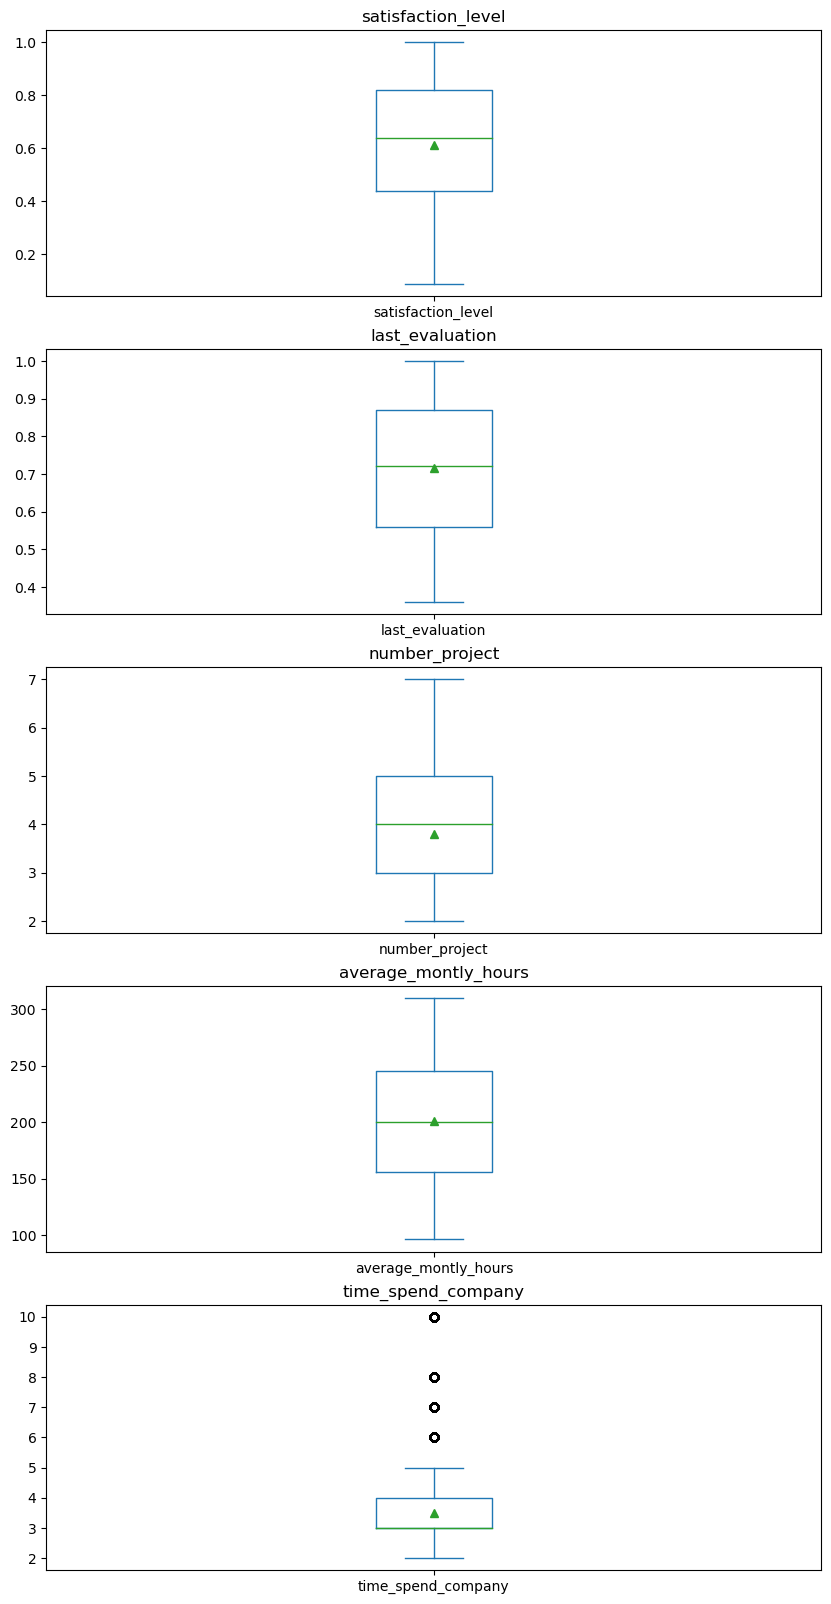

In [27]:
datos_num = data[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']]

row, col = datos_num.shape
fig, axes = plt.subplots(nrows=col, ncols=1, figsize=(10,20))
j = 0

for i in datos_num:
  datos_num[i].plot(kind='box', showmeans=True, ax=axes[j], title=str(i))
  j +=1

/home/pop-jaroso/anaconda3/envs/trabajosaa/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


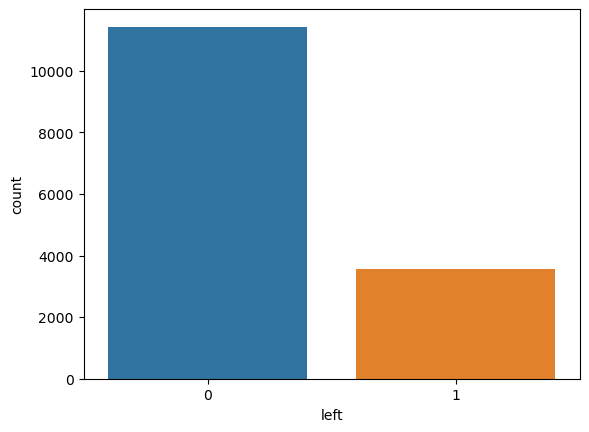

/home/pop-jaroso/anaconda3/envs/trabajosaa/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


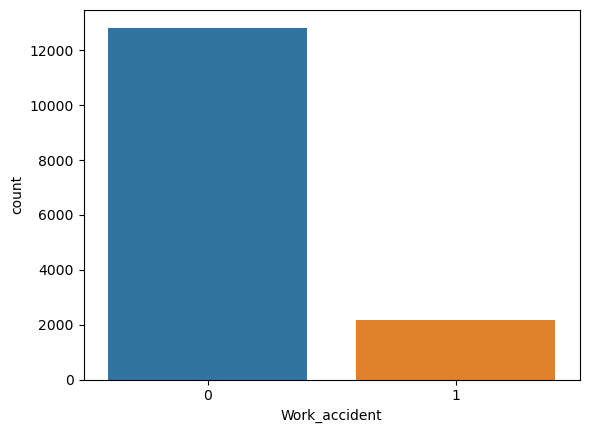

/home/pop-jaroso/anaconda3/envs/trabajosaa/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


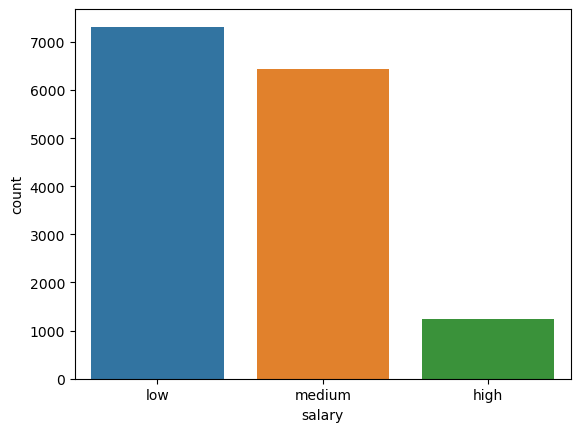

/home/pop-jaroso/anaconda3/envs/trabajosaa/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


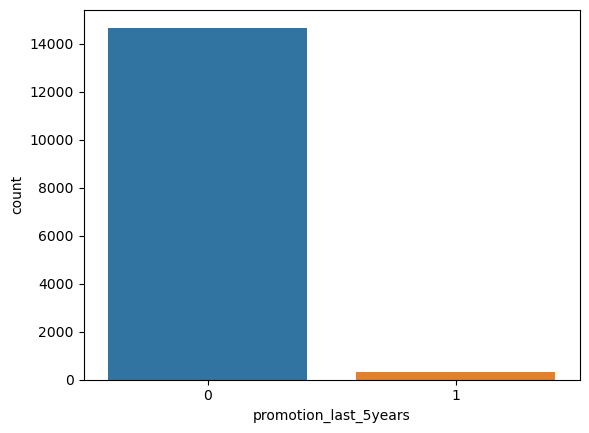

/home/pop-jaroso/anaconda3/envs/trabajosaa/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


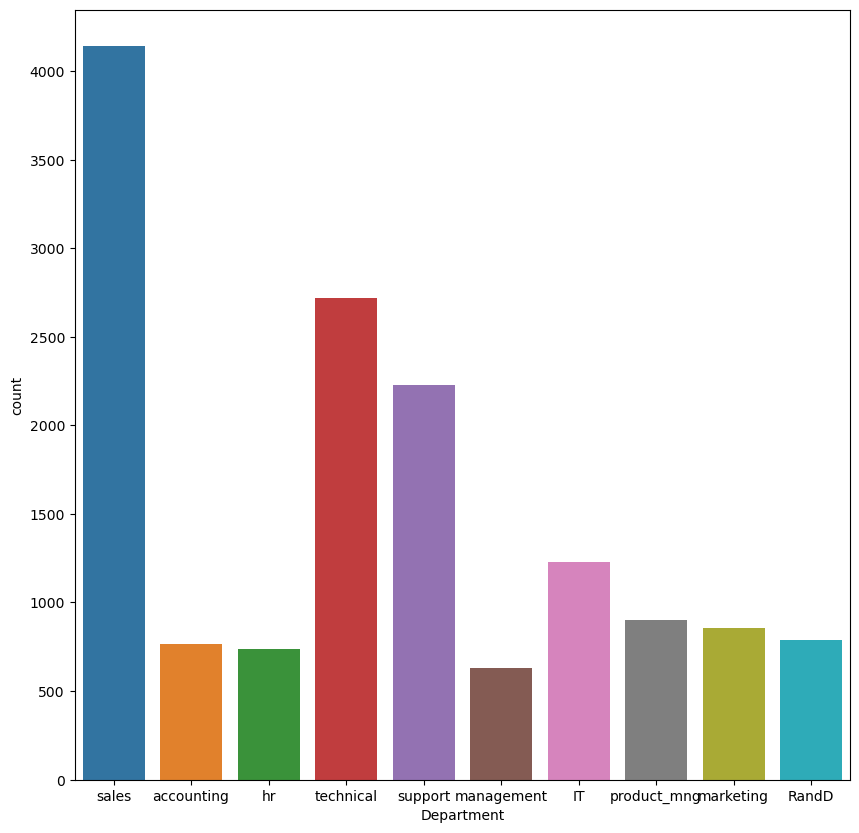

In [28]:
for i in ['left', 'Work_accident', 'salary', 'promotion_last_5years', 'Department']:

    if i == 'Department':
        plt.figure(figsize=(10,10))
        sns.countplot(data[i])
        plt.show()
    else:
        sns.countplot(data[i])
        plt.show()


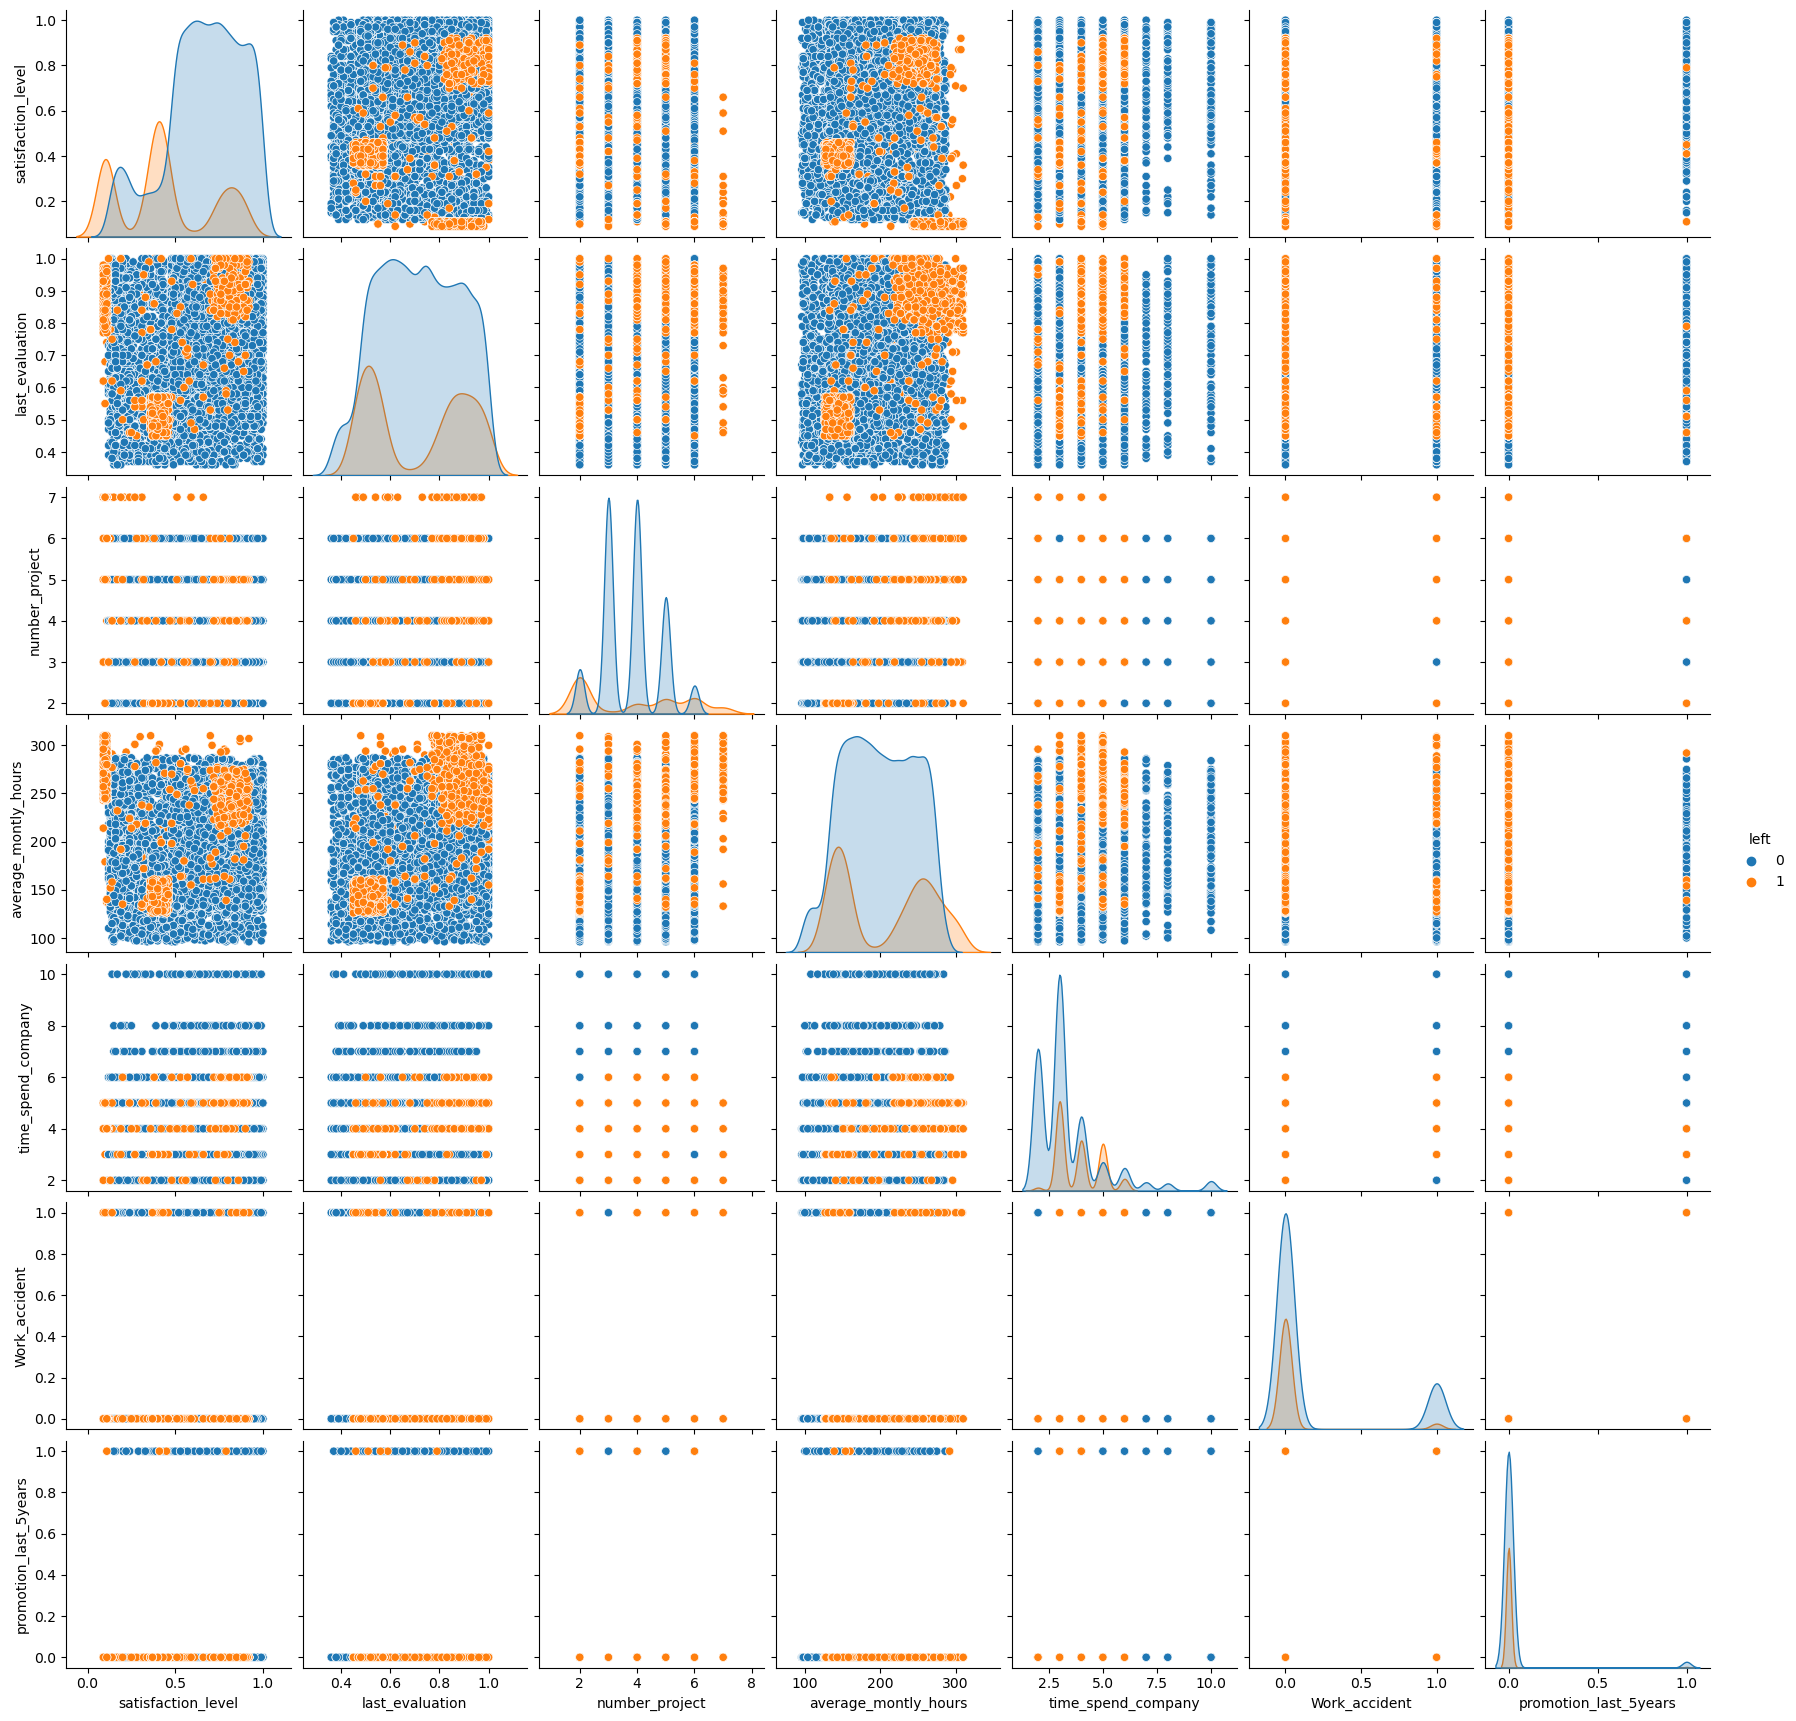

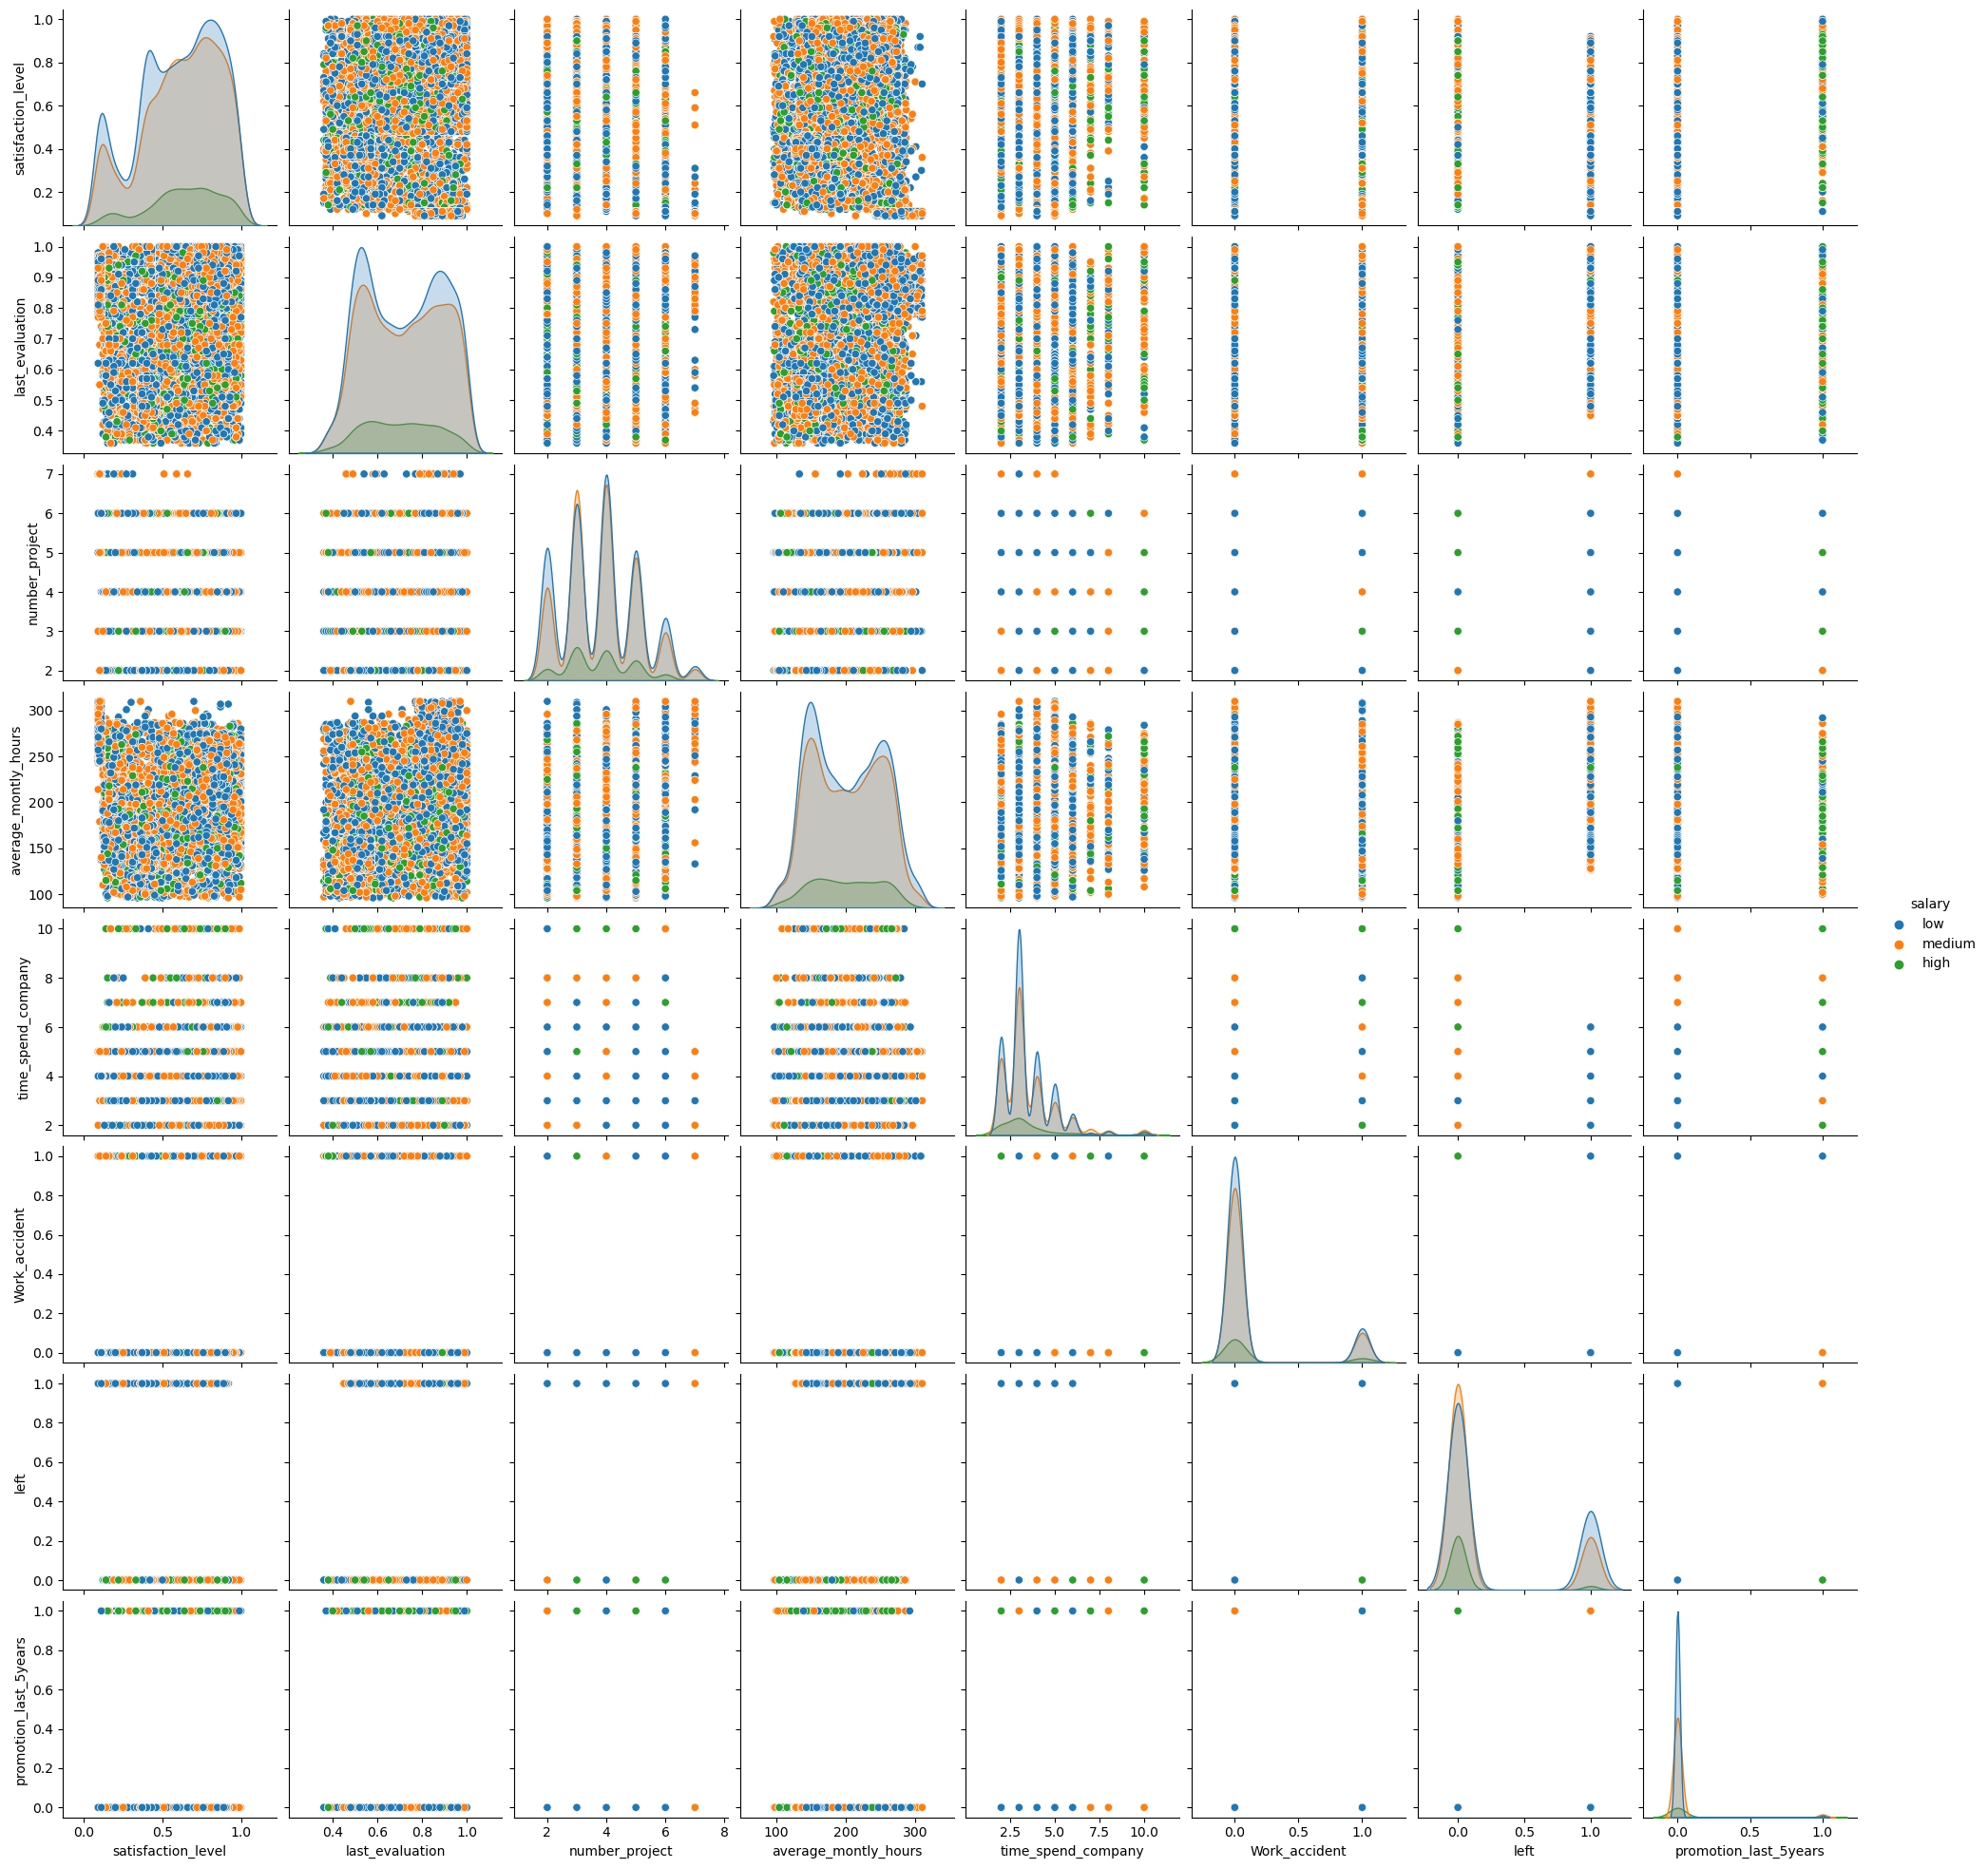

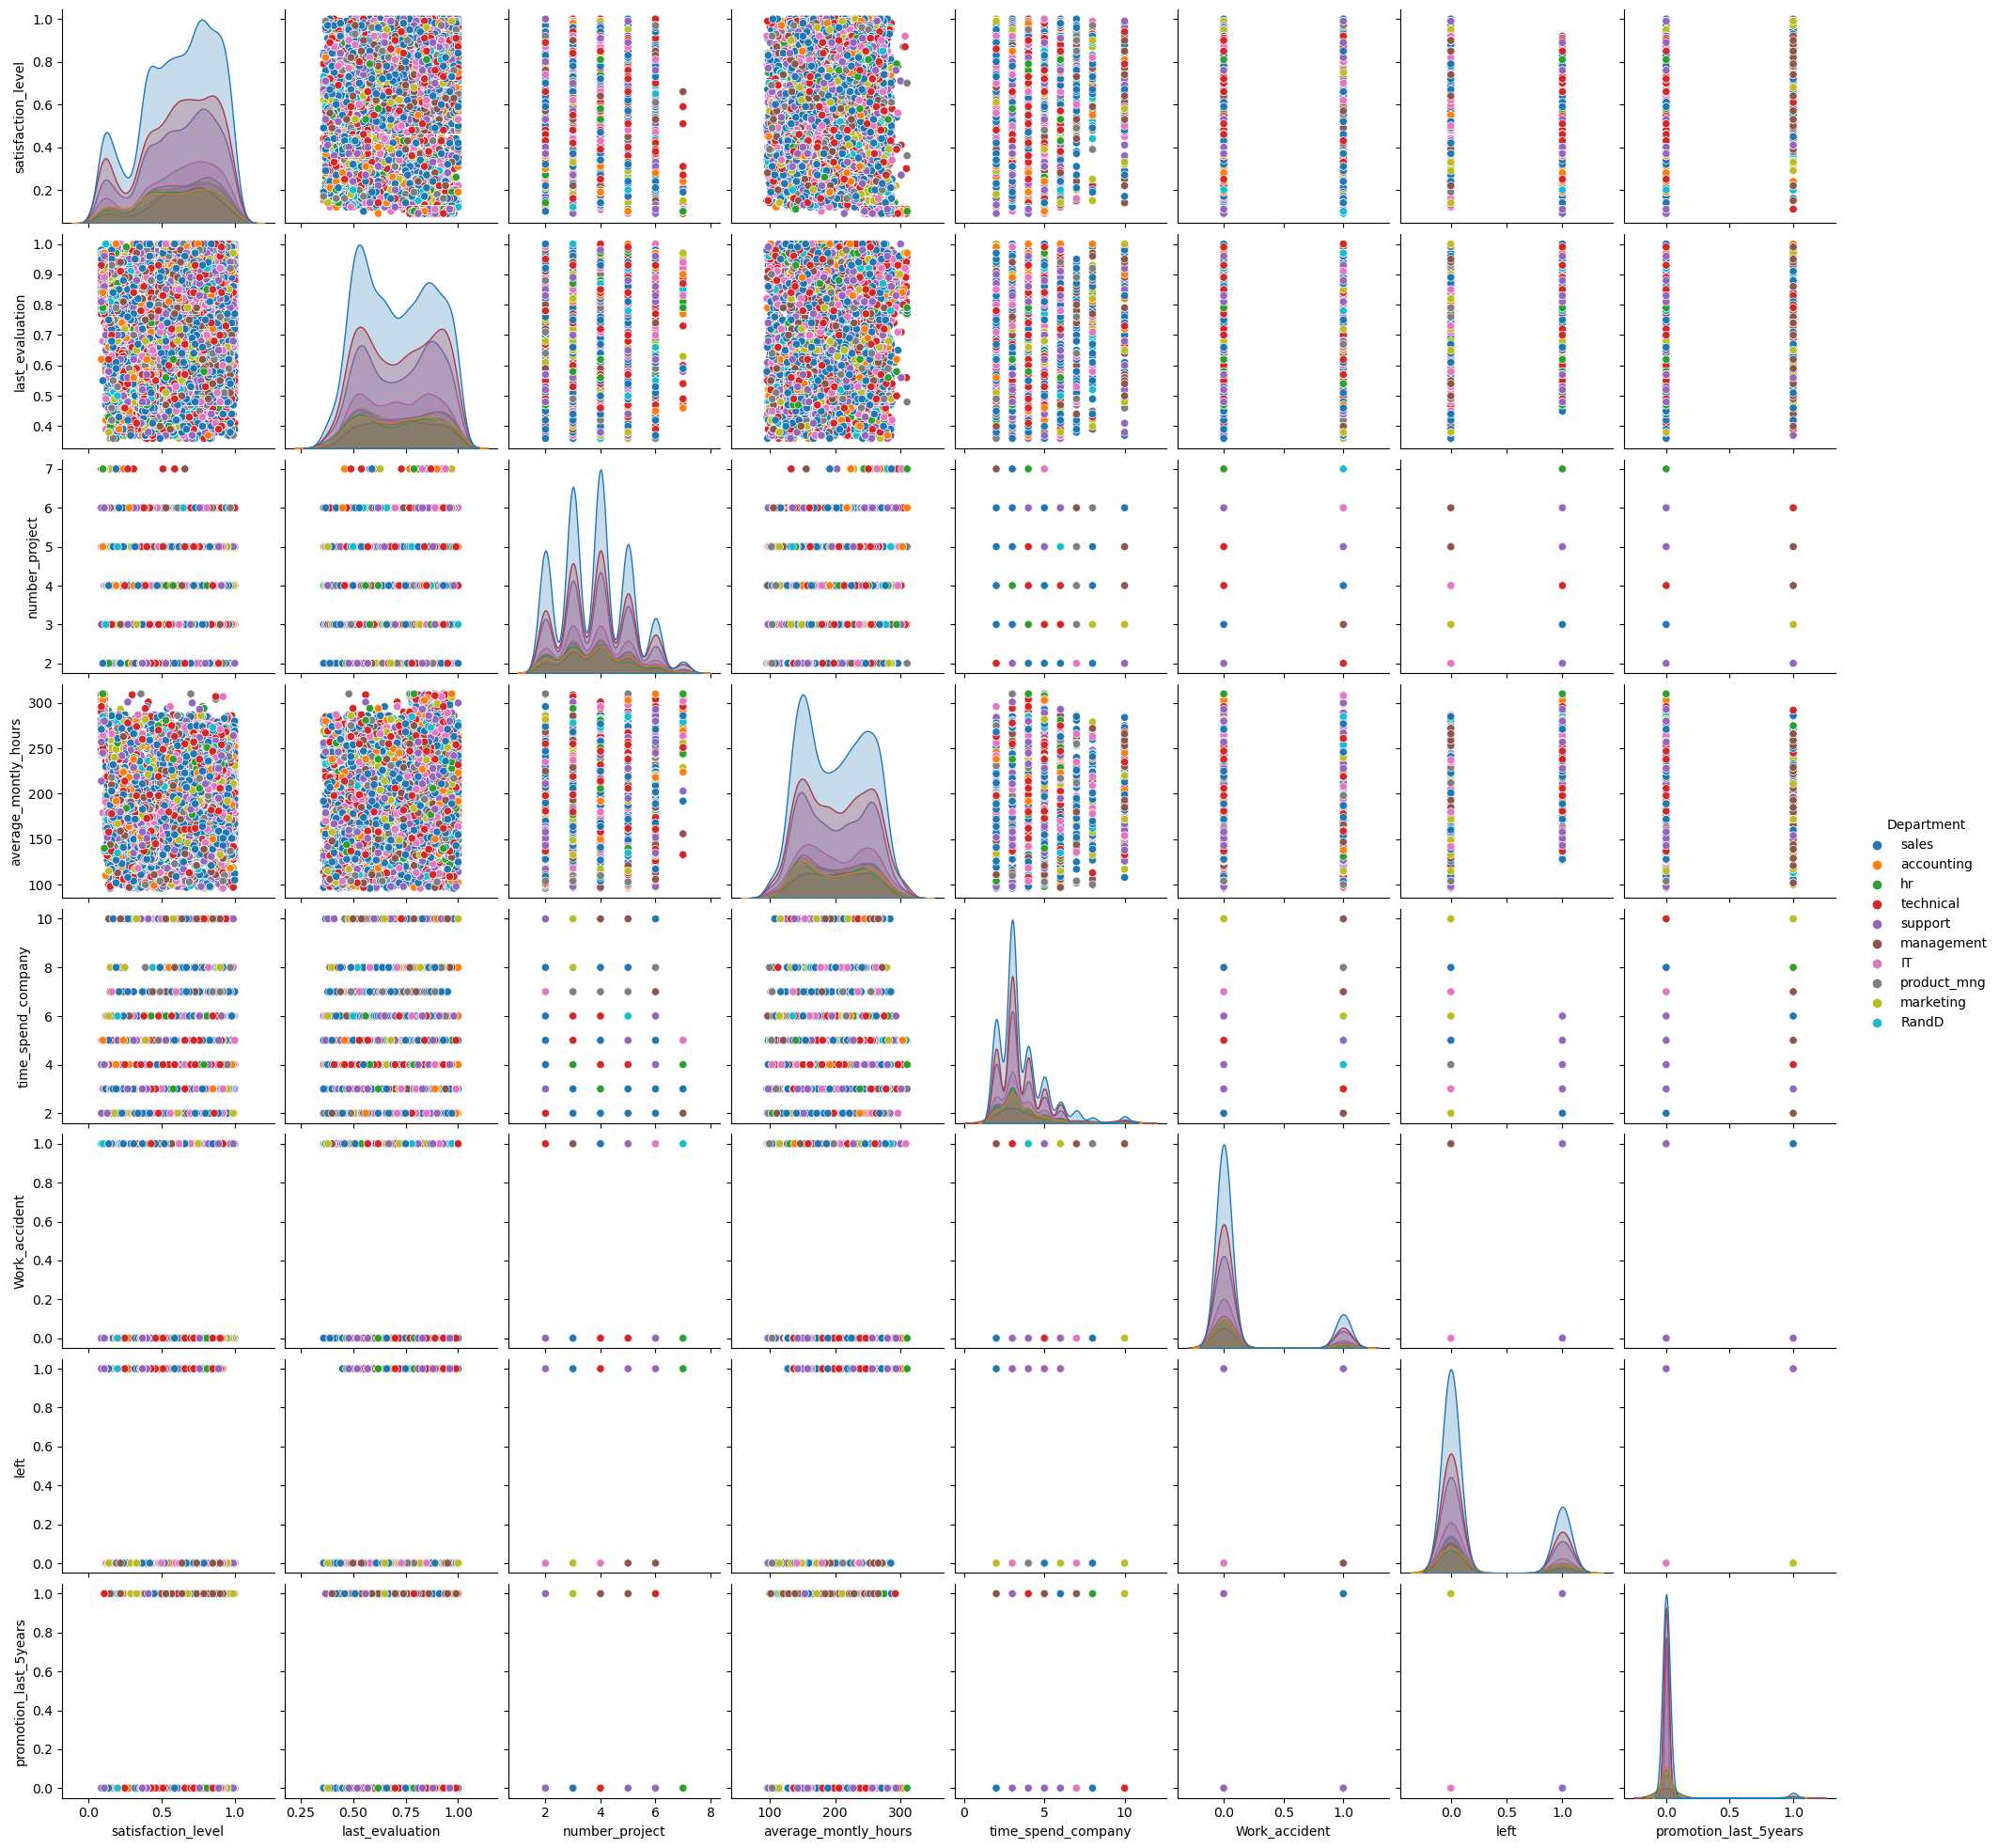

In [12]:
for i in ['left', 'salary', 'Department']:
    sns.pairplot(data, hue = i)

<AxesSubplot:>

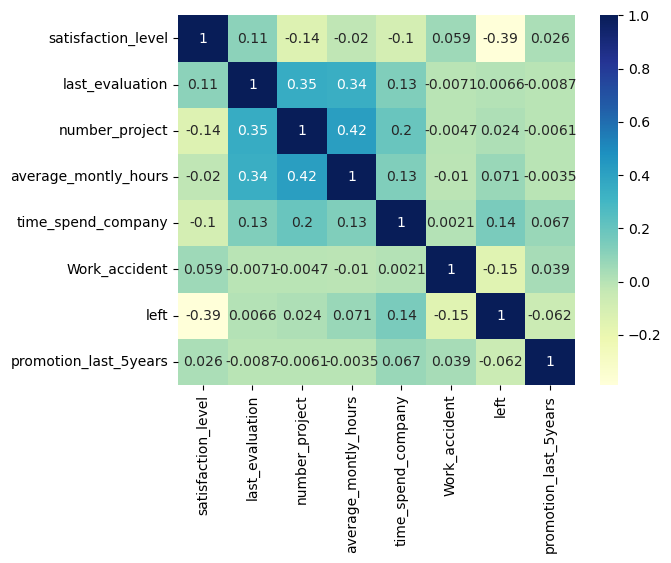

In [29]:
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

## Organizando las variables
1. se crean las variables para el modelo
2. se sacan variables dummies de las variables categoricas
3. se trata el desbalance de los datos
4. se normalizan las variables number_project, Average_monthly_hours

In [30]:
X= data[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'Department', 'salary']]
y=data['left']
amh=np.array(X['average_montly_hours'])


## Variables Dummy

In [54]:
X = pd.get_dummies(X, columns = ["Department","salary"], prefix=['Dept_','sal_'])





In [55]:
display(X.head())


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  Dept__IT  \
0                   3              0                      0         0   
1                   6              0                      0         0   
2                   4              0                      0         0   
3                   5              0                      0         0   
4                   3              0                      0         0   

   Dept__RandD  Dept__accounting  Dept__hr  Dept__management  Dept__marketing  \
0            0                 0         0                 0                0   
1            0                 0         0                 0                0   
2            0                 0         0                 0                0   
3            0                 0         0                 0                0   
4            0                 0         0                 0                0   

   Dept__product_mng  Dept__sales  Dept__support  Dept__technical  sal__high  \
0                  0            1              0                0          0   
1                  0            1              0                0          0   
2                  0            1              0                0          0   
3                  0            1              0                0          0   
4                  0            1              0                0          0   

   sal__low  sal__medium  
0         1            0  
1         0            1  
2         0            1  
3         1            0  
4         1            0

## SMOTE para balanceo de los datos

In [58]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 11428, 0: 11428})


In [59]:
X_res.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  Dept__IT  \
0                   3              0                      0         0   
1                   6              0                      0         0   
2                   4              0                      0         0   
3                   5              0                      0         0   
4                   3              0                      0         0   

   Dept__RandD  Dept__accounting  Dept__hr  Dept__management  Dept__marketing  \
0            0                 0         0                 0                0   
1            0                 0         0                 0                0   
2            0                 0         0                 0                0   
3            0                 0         0                 0                0   
4            0                 0         0                 0                0   

   Dept__product_mng  Dept__sales  Dept__support  Dept__technical  sal__high  \
0                  0            1              0                0          0   
1                  0            1              0                0          0   
2                  0            1              0                0          0   
3                  0            1              0                0          0   
4                  0            1              0                0          0   

   sal__low  sal__medium  
0         1            0  
1         0            1  
2         0            1  
3         1            0  
4         1            0

In [61]:
amh=np.array(X_res['average_montly_hours'])
num_proj = np.array(X_res['number_project'])
time_spend_comp = np.array(X_res['time_spend_company'])

In [62]:
amh_norm = sklearn.preprocessing.normalize([amh], norm='l2',axis=1, copy=True, return_norm=False)
num_proj_norm = sklearn.preprocessing.normalize([amh], norm='l2',axis=1, copy=True, return_norm=False)
time_spend_comp = sklearn.preprocessing.normalize([amh], norm='l2',axis=1, copy=True, return_norm=False)

In [63]:
X_res.insert(2,'amhn',amh_norm[0])
X_res.insert(2,'num_proj',num_proj_norm[0])
X_res.insert(2,'time_spend',time_spend_comp[0])
del(X_res['number_project'])
del(X_res['average_montly_hours'])
del(X_res['time_spend_company'])

X_res.rename(columns = {'amhn':'average_montly_hours', 'num_proj':'number_project','time_spend':'time_spend_company'}, inplace = True)


In [64]:
X_res.head()

satisfaction_level  last_evaluation  time_spend_company  number_project  \
0                0.38             0.53            0.004933        0.004933   
1                0.80             0.86            0.008232        0.008232   
2                0.11             0.88            0.008546        0.008546   
3                0.72             0.87            0.007007        0.007007   
4                0.37             0.52            0.004996        0.004996   

   average_montly_hours  Work_accident  promotion_last_5years  Dept__IT  \
0              0.004933              0                      0         0   
1              0.008232              0                      0         0   
2              0.008546              0                      0         0   
3              0.007007              0                      0         0   
4              0.004996              0                      0         0   

   Dept__RandD  Dept__accounting  Dept__hr  Dept__management  Dept__marketing  \
0            0                 0         0                 0                0   
1            0                 0         0                 0                0   
2            0                 0         0                 0                0   
3            0                 0         0                 0                0   
4            0                 0         0                 0                0   

   Dept__product_mng  Dept__sales  Dept__support  Dept__technical  sal__high  \
0                  0            1              0                0          0   
1                  0            1              0                0          0   
2                  0            1              0                0          0   
3                  0            1              0                0          0   
4                  0            1              0                0          0   

   sal__low  sal__medium  
0         1            0  
1         0            1  
2         0            1  
3         1            0  
4         1            0

In [65]:
X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X_res,y_res, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [68]:
LR = sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
LR.fit(X_train, y_train)




LogisticRegression()